In [32]:
from keras.datasets.mnist import load_data
from keras.models import Sequential, load_model

from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt

In [37]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train = X_train[:10000].reshape(10000, 784, 1) / 255.
X_test = X_test[:2000].reshape(2000, 784, 1) / 255.

y_train = y_train[:10000]
y_test = y_test[:2000]

In [15]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, el in enumerate(arr):
    arr[i] = el / 2

arr

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [17]:
kmeans = KMeans(n_clusters=2, n_init=1, tol=0.1, max_iter=10)
for i, x in enumerate(X_test):
    kmeans.fit(x)
    x_s = kmeans.cluster_centers_[kmeans.labels_]
    X_test[i] = x_s
    if i % 100 == 0:
        print(i, 'images segmented')

0 images segmented
100 images segmented
200 images segmented
300 images segmented
400 images segmented
500 images segmented
600 images segmented
700 images segmented
800 images segmented
900 images segmented
1000 images segmented
1100 images segmented
1200 images segmented
1300 images segmented
1400 images segmented
1500 images segmented
1600 images segmented
1700 images segmented
1800 images segmented
1900 images segmented


In [19]:
kmeans = KMeans(n_clusters=2, n_init=1, tol=0.1, max_iter=10)
for i, x in enumerate(X_train):
    kmeans.fit(x)
    x_s = kmeans.cluster_centers_[kmeans.labels_]
    X_train[i] = x_s
    if i % 100 == 0:
        print(i, 'images segmented')

0 images segmented
100 images segmented
200 images segmented
300 images segmented
400 images segmented
500 images segmented
600 images segmented
700 images segmented
800 images segmented
900 images segmented
1000 images segmented
1100 images segmented
1200 images segmented
1300 images segmented
1400 images segmented
1500 images segmented
1600 images segmented
1700 images segmented
1800 images segmented
1900 images segmented
2000 images segmented
2100 images segmented
2200 images segmented
2300 images segmented
2400 images segmented
2500 images segmented
2600 images segmented
2700 images segmented
2800 images segmented
2900 images segmented
3000 images segmented
3100 images segmented
3200 images segmented
3300 images segmented
3400 images segmented
3500 images segmented
3600 images segmented
3700 images segmented
3800 images segmented
3900 images segmented
4000 images segmented
4100 images segmented
4200 images segmented
4300 images segmented
4400 images segmented
4500 images segmented


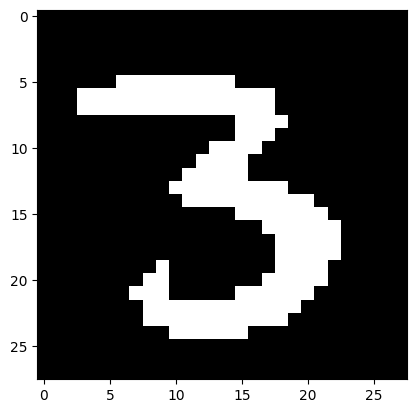

In [21]:
plt.imshow(X_train[12].reshape(28, 28), cmap='gray')

In [24]:
model = load_model(
'/home/adam/Development/Machine_learning/Study/Hands-on-Machine-Learning/3. mnist_classification/models/best_accuracy.h5'
)

2023-01-09 11:11:50.972142: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-09 11:11:50.972213: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-09 11:11:50.972288: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-01-09 11:11:51.000861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
predictions = model.predict(X_train.reshape(10000, 28, 28))

2023-01-09 11:18:15.388778: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 8s 26ms/step


In [44]:
def accuracy(y_true, y_pred):
    return print(f'accuracy :{round(sum([np.argmax(y_pred[i]) == y_true[i] for i in range(len(y_true))]) / len(y_true) * 100, 1)}%')

In [35]:
predictions.shape

(2000, 10)

In [36]:
y_test.shape

(10000,)

In [47]:
accuracy(y_test, predictions)

accuracy :9.8%
